# 神经网络和机器学习之基础知识


“神经网络和机器学习”的系列案例选择了keras框架，需要先安装keras和tensorflow。虚谷号教育版已经预装必要的库，可以直接使用。

下面是安装命令。

! pip install keras

使用keras库，还需要先安装tensorflow。建议选择清华源，安装速度快多了。

! pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

## 1.学习内容

神经网络是计算智能和机器学习的重要分支，在很多领域都取得了很大的成功。本系列课程将涉及到很多基础知识，如：

- NumPy。NumPy全称为Numerical Python，是一个开源的 Python 科学计算库，用于快速处理任意维度的数组。
- Pandas。Pandas是基于 NumPy 的一种工具，该工具是为了解决数据分析任务而创建的。
- Matplotlib。Matplotlib是 Python 的一个绘图库。它包含了大量的工具，你可以使用这些工具创建各种图形，包括简单的散点图，正弦曲线，甚至是三维图形。
- keras。Keras是一个由Python编写的开源人工神经网络库，可以作为Tensorflow、Microsoft-CNTK和Theano的高阶应用程序接口，进行深度学习模型的设计、调试、评估、应用和可视化。

考虑到很多教程仅仅介绍了数据整理和模型训练，对训练好对模型如何应用并没有拓展，本教程重点介绍在keras中如何保存模型、导入模型、应用模型。

## 2.模型的保存

训练出来的模型，可以保存为单独的文件。下次使用的时候载入，还可以继续训练。一般保存为h5格式，需要先安装h5py。

命令如下：pip install h5py

In [ ]:
import keras
from keras import layers
model=keras.models.Sequential()
model.add(layers.Dense(units=32,input_dim=3,activation='relu'))
model.add(layers.Dense(units=1))
# 编译模型
model.compile(optimizer='adam',loss='mse')
# 保存模型这是HDF5文件。
model.save('0-model-vv.h5') 

## 3.模型的导入

保存好的模型可以用`load_model`语句载入。“4-model-vv.h5”是图像聚类的训练模型，用的是著名的CIFAR-10数据集。

In [1]:
from keras.models import load_model
model = load_model('./model/4-model-vv.h5')

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/Keras-2.2.4-py3.5.egg/keras/engine/saving.py:303: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


**注意：**如果是不同版本上训练的模型，加载需要加上compile=False参数。如果用低版本的加载成功再保存，模型就成功转换为低版本了。

In [2]:
#载入低版本的模型
model = load_model('./model/4-model-vv.h5', compile=False)

载入模型后，可以用summary方法来输出模型的详细参数。

In [3]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

In [4]:
# 获得其中一层
layer = model.get_layer(index = 0)
# 输出配置信息
print(layer.get_config())

{'kernel_constraint': None, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'seed': None, 'distribution': 'uniform', 'mode': 'fan_avg', 'scale': 1.0}}, 'strides': (1, 1), 'bias_regularizer': None, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'data_format': 'channels_last', 'activation': 'relu', 'batch_input_shape': (None, 32, 32, 3), 'padding': 'valid', 'kernel_regularizer': None, 'trainable': True, 'dtype': 'float32', 'filters': 64, 'activity_regularizer': None, 'dilation_rate': (1, 1), 'kernel_size': (3, 3), 'use_bias': True, 'name': 'conv2d_5', 'bias_constraint': None}


所有的Keras层对象都有如下方法：
- layer.get_weights()：返回层的权重（numpy array）。
- layer.set_weights(weights)：从numpy array中将权重加载到该层中，要求numpy array的形状与* layer.get_weights()的形状相同。
- layer.get_config()：返回当前层配置信息（字典类型），层也可以借由配置信息重构。

In [5]:
# 输出Keras层对象的输入张量
layer.input

<tf.Tensor 'conv2d_5_input_1:0' shape=(?, 32, 32, 3) dtype=float32>

可以看出，输入的是4个维度的数据，其中第一个维度不参加计算。

如果层仅有一个计算节点（即该层不是共享层），则可以通过下列方法获得输入张量、输出张量、输入数据的形状和输出数据的形状：
- layer.input
- layer.output
- layer.input_shape
- layer.output_shape

如果觉得输出来的参数看起来很专业，难以理解，我们还可以画个图。Keras中提供了一个功能，可以给这个模型画出直观的图。这需要一个名为`pydot`支持库，用pip安装。如果安装失败，可以试试更换pip源。

! pip install pydot

! pip install -i https://pypi.tuna.tsinghua.edu.cn/simple pydot

一般来说，还需要安装graphviz。

在虚谷号上，用这样的命令来安装：sudo apt install graphviz。其他系统的安装，请自行百度。

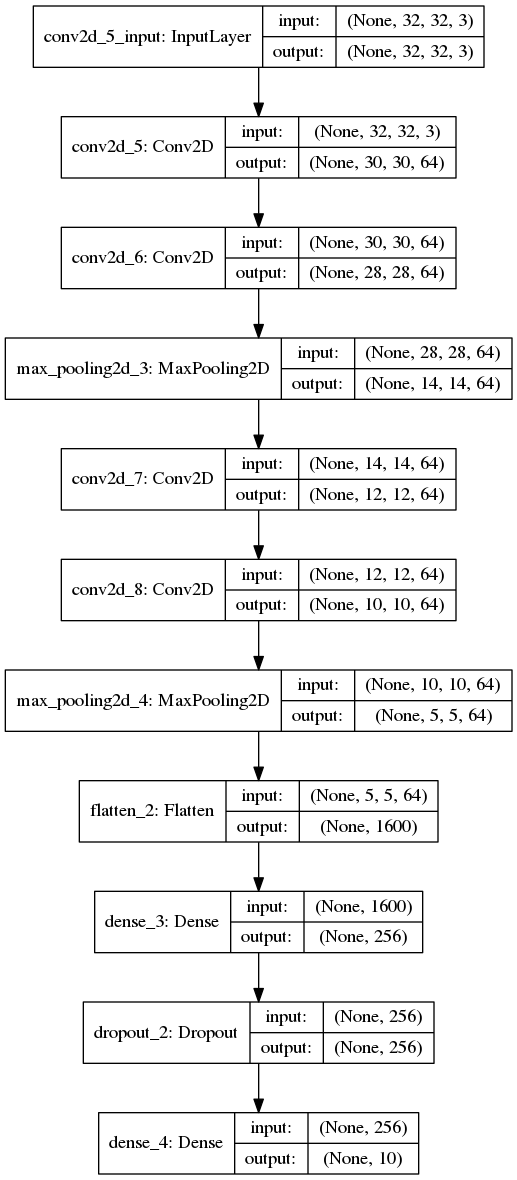

In [6]:
# 在目录下将产生一个名为“model.png”的图片，显示出这个模型的神经网络模型图
from keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True)

从图中可以看出，这个模型输入的是4个维度的数据，输出是2个维度的数据，最后是10个分类。

这个模型还可以继续训练，只要给符合要求的数据。如：

model.fit(x=train_image,y=train_label,batch_size=500,epochs=5,validation_data=(test_image,test_label))

也可以测试一下原来数据集中的test部分。

t=model.predict(test_image[0:10]).tolist()

## 4.模型的应用

接下来这个模型应用在具体的图片识别代码中。我上网搜索了一些青蛙的图片，保存为png格式。

In [7]:
#定义动物的名称
things_class=["airplane","automodile","bird","cat","deer","dog","frog","horse","ship","truck"]
#因为模型识别的数据是数组，所以先建一个数组。
image=[]

In [8]:
from keras.preprocessing import image as k_image
# 直接用keras库的image.load_img，image.load_img()只是加载了一个文件，没有形成numpy数组。
# 参数：grayscale表示是否灰度转换，可以为空；target_size为大小转换，=None为原始大小
r_img = k_image.load_img('./img/6-1.png',target_size=(32, 32),grayscale=False)
print(r_img)

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F9098B208>


In [9]:
#用image.img_to_array转为array的数组。
img_keras = k_image.img_to_array(r_img,dtype="uint8")
print(img_keras.shape)

(32, 32, 3)


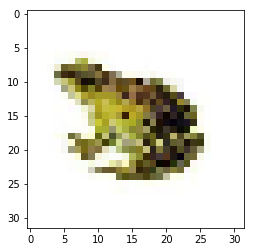

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img_keras)

In [11]:
#加入数组image
image.append(img_keras)
#转为np的array数组。
import numpy as np
np_image = np.array(image)
#查看数组的类型，是否和数据集一致：uint8
print(np_image.dtype)

uint8


In [12]:
#查看数组的大小，是否和数据集一致：
print(np_image.shape)

(1, 32, 32, 3)


In [13]:
#测试一下图片
t=model.predict(np_image).tolist()

In [15]:
#输出图，可以看到这个图片在维度6数字最大，达到了0.99。6代表的是‘dog’（青蛙）。
print(t)

[[7.049037464845753e-10, 9.90105783818529e-13, 5.4150287809306974e-08, 3.8619982660748065e-06, 3.672687412731698e-20, 7.747966900223738e-14, 0.9999961853027344, 1.150428984078845e-26, 1.3056783844216102e-13, 4.245378354417184e-12]]


In [16]:
#可以用predict_classes直接输出识别结果
t=model.predict_classes(np_image)
print(t)

[6]


In [17]:
#结合things_class，直接输出名称
print(things_class[int(t)])

frog


如何利用这个模型，开发有趣的应用，就靠大家的创意了。